In [13]:
!pip3 install face_recognition
!pip install timm


In [14]:
#THis code is to check if the video is corrupted or not..
#If the video is corrupted delete the video.
import glob
import torch
import torchvision
from torchvision import transforms
from torch.utils.data import DataLoader
from torch.utils.data.dataset import Dataset
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
import face_recognition
#Check if the file is corrupted or not
def validate_video(vid_path,train_transforms):
      transform = train_transforms
      count = 20
      video_path = vid_path
      frames = []
      a = int(100/count)
      first_frame = np.random.randint(0,a)
      temp_video = video_path.split('/')[-1]
      for i,frame in enumerate(frame_extract(video_path)):
        frames.append(transform(frame))
        if(len(frames) == count):
          break
      frames = torch.stack(frames)
      frames = frames[:count]
      return frames
#extract a from from video
def frame_extract(path):
  vidObj = cv2.VideoCapture(path) 
  success = 1
  while success:
      success, image = vidObj.read()
      if success:
          yield image

im_size = 112
mean = [0.485, 0.456, 0.406]
std = [0.229, 0.224, 0.225]

train_transforms = transforms.Compose([
                                        transforms.ToPILImage(),
                                        transforms.Resize((im_size,im_size)),
                                        transforms.ToTensor(),
                                        transforms.Normalize(mean,std)])
video_fil =  glob.glob('/kaggle/input/deepfake-face-only/Celeb_fake_face_only/Celeb_fake_face_only/*.mp4')
video_fil += glob.glob('/kaggle/input/deepfake-face-only/Celeb_real_face_only/Celeb_real_face_only/*.mp4')
video_fil += glob.glob('/kaggle/input/deepfake-face-only/DFDC_FAKE_Face_only_data/DFDC_FAKE_Face_only_data/*.mp4')
video_fil += glob.glob('/kaggle/input/deepfake-face-only/DFDC_REAL_Face_only_data/DFDC_REAL_Face_only_data/*.mp4')
video_fil += glob.glob('/kaggle/input/deepfake-face-only/FF_Face_only_data/FF_Face_only_data/*.mp4')
print("Total no of videos :" , len(video_fil))
print(video_fil)
count = 0;
for i in video_fil:
  try:
    count+=1
    validate_video(i,train_transforms)
  except:
    print("Number of video processed: " , count ," Remaining : " , (len(video_fil) - count))
    print("Corrupted video is : " , i)
    continue
print((len(video_fil) - count))

Total no of videos : 6450
['/kaggle/input/deepfake-face-only/Celeb_fake_face_only/Celeb_fake_face_only/id52_id49_0008.mp4', '/kaggle/input/deepfake-face-only/Celeb_fake_face_only/Celeb_fake_face_only/id39_id42_0007.mp4', '/kaggle/input/deepfake-face-only/Celeb_fake_face_only/Celeb_fake_face_only/id59_id61_0007.mp4', '/kaggle/input/deepfake-face-only/Celeb_fake_face_only/Celeb_fake_face_only/id21_id26_0009.mp4', '/kaggle/input/deepfake-face-only/Celeb_fake_face_only/Celeb_fake_face_only/id61_id60_0005.mp4', '/kaggle/input/deepfake-face-only/Celeb_fake_face_only/Celeb_fake_face_only/id56_id49_0006.mp4', '/kaggle/input/deepfake-face-only/Celeb_fake_face_only/Celeb_fake_face_only/id11_id7_0001.mp4', '/kaggle/input/deepfake-face-only/Celeb_fake_face_only/Celeb_fake_face_only/id30_id32_0004.mp4', '/kaggle/input/deepfake-face-only/Celeb_fake_face_only/Celeb_fake_face_only/id29_id31_0003.mp4', '/kaggle/input/deepfake-face-only/Celeb_fake_face_only/Celeb_fake_face_only/id2_id37_0007.mp4', '/kag

In [15]:
#to load preprocessod video to memory
import json
import glob
import numpy as np
import cv2
import copy
import random
video_files =  glob.glob('/kaggle/input/deepfake-face-only/Celeb_fake_face_only/Celeb_fake_face_only/*.mp4')
video_files += glob.glob('/kaggle/input/deepfake-face-only/Celeb_real_face_only/Celeb_real_face_only/*.mp4')
video_files += glob.glob('/kaggle/input/deepfake-face-only/DFDC_FAKE_Face_only_data/DFDC_FAKE_Face_only_data/*.mp4')
video_files += glob.glob('/kaggle/input/deepfake-face-only/DFDC_REAL_Face_only_data/DFDC_REAL_Face_only_data/*.mp4')
video_files += glob.glob('/kaggle/input/deepfake-face-only/FF_Face_only_data/FF_Face_only_data/*.mp4')
random.shuffle(video_files)
random.shuffle(video_files)
frame_count = []
for video_file in video_files:
  cap = cv2.VideoCapture(video_file)
  if(int(cap.get(cv2.CAP_PROP_FRAME_COUNT))<100):
    video_files.remove(video_file)
    continue
  frame_count.append(int(cap.get(cv2.CAP_PROP_FRAME_COUNT)))
print("frames are " , frame_count)
print("Total no of video: " , len(frame_count))
print('Average frame per video:',np.mean(frame_count))

frames are  [148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 141, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 14

In [16]:
# load the video name and labels from csv
import torch
import torchvision
from torchvision import transforms
from torch.utils.data import DataLoader
from torch.utils.data.dataset import Dataset
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
import face_recognition
class video_dataset(Dataset):
    def __init__(self,video_names,labels,sequence_length = 60,transform = None):
        self.video_names = video_names
        self.labels = labels
        self.transform = transform
        self.count = sequence_length
    def __len__(self):
        return len(self.video_names)
    def __getitem__(self,idx):
        video_path = self.video_names[idx]
        frames = []
        a = int(100/self.count)
        first_frame = np.random.randint(0,a)
        temp_video = video_path.split('/')[-1]
        #print(temp_video)
        label = self.labels.iloc[(labels.loc[labels["file"] == temp_video].index.values[0]),1]
        if(label == 'FAKE'):
          label = 0
        if(label == 'REAL'):
          label = 1
        for i,frame in enumerate(self.frame_extract(video_path)):
          frames.append(self.transform(frame))
          if(len(frames) == self.count):
            break
        frames = torch.stack(frames)
        frames = frames[:self.count]
        #print("length:" , len(frames), "label",label)
        return frames,label
    def frame_extract(self,path):
      vidObj = cv2.VideoCapture(path) 
      success = 1
      while success:
          success, image = vidObj.read()
          if success:
              yield image
#plot the image
def im_plot(tensor):
    image = tensor.cpu().numpy().transpose(1,2,0)
    b,g,r = cv2.split(image)
    image = cv2.merge((r,g,b))
    image = image*[0.22803, 0.22145, 0.216989] +  [0.43216, 0.394666, 0.37645]
    image = image*255.0
    plt.imshow(image.astype(int))
    plt.show()

In [17]:
#count the number of fake and real videos
def number_of_real_and_fake_videos(data_list):
  header_list = ["file","label"]
  lab = pd.read_csv('/kaggle/input/labels/Gobal_metadata.csv',names=header_list)
  fake = 0
  real = 0
  for i in data_list:
    temp_video = i.split('/')[-1]
    label = lab.iloc[(labels.loc[labels["file"] == temp_video].index.values[0]),1]
    if(label == 'FAKE'):
      fake+=1
    if(label == 'REAL'):
      real+=1
  return real,fake

train :  5141
test :  1286
TRAIN:  Real: 2648  Fake: 2493
TEST:  Real: 653  Fake: 633


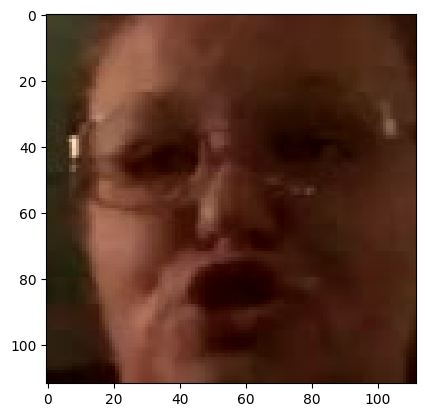

In [21]:
# load the labels and video in data loader
import random
import pandas as pd
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import timm

# Read the labels
header_list = ["file","label"]
labels = pd.read_csv('/kaggle/input/labels/Gobal_metadata.csv', names=header_list)

# Split the videos into training and validation sets
train_videos = video_files[:int(0.8 * len(video_files))]
valid_videos = video_files[int(0.8 * len(video_files)):]
print("train : ", len(train_videos))
print("test : ", len(valid_videos))

# Assuming you have a function `number_of_real_and_fake_videos` defined
print("TRAIN: ", "Real:", number_of_real_and_fake_videos(train_videos)[0], " Fake:", number_of_real_and_fake_videos(train_videos)[1])
print("TEST: ", "Real:", number_of_real_and_fake_videos(valid_videos)[0], " Fake:", number_of_real_and_fake_videos(valid_videos)[1])

# Define image transformations
im_size = 112
mean = [0.485, 0.456, 0.406]
std = [0.229, 0.224, 0.225]

train_transforms = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize((im_size, im_size)),
    transforms.ToTensor(),
    transforms.Normalize(mean, std)
])

test_transforms = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize((im_size, im_size)),
    transforms.ToTensor(),
    transforms.Normalize(mean, std)
])

# Create datasets and dataloaders
train_data = video_dataset(train_videos, labels, sequence_length=10, transform=train_transforms)
val_data = video_dataset(valid_videos, labels, sequence_length=10, transform=test_transforms)
train_loader = DataLoader(train_data, batch_size=4, shuffle=True, num_workers=4)
valid_loader = DataLoader(val_data, batch_size=4, shuffle=True, num_workers=4)
image,label = train_data[0]
im_plot(image[0,:,:,:])

In [24]:
#Model with feature visualization
import random
import pandas as pd
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import timm
class Model(nn.Module):
    def __init__(self, num_classes, latent_dim=2048, lstm_layers=1, hidden_dim=2048, bidirectional=False):
        super(Model, self).__init__()
        # Load the pre-trained Xception model from timm
        model = timm.create_model('xception', pretrained=True)
        self.model = nn.Sequential(*list(model.children())[:-2])
        self.lstm = nn.LSTM(input_size=2048, hidden_size=hidden_dim, num_layers=lstm_layers, bidirectional=bidirectional)
        self.relu = nn.LeakyReLU()
        self.dp = nn.Dropout(0.4)
        self.linear1 = nn.Linear(hidden_dim, num_classes)
        self.avgpool = nn.AdaptiveAvgPool2d(1)

    def forward(self, x):
        batch_size, seq_length, c, h, w = x.shape
        x = x.view(batch_size, seq_length, c, h, w)  # Restore the sequence dimension
        fmap = self.model(x.view(-1, c, h, w))  # Process each frame individually
        x = self.avgpool(fmap)
        x = x.view(batch_size, seq_length, -1)  # Reshape to [batch_size, seq_length, hidden_dim]

        # Permute dimensions for LSTM input
        x_lstm = x.permute(1, 0, 2)  # Shape: [seq_length, batch_size, hidden_dim]
        x_lstm, _ = self.lstm(x_lstm)

        return fmap, self.dp(self.linear1(torch.mean(x_lstm, dim=0)))

In [25]:
model = Model(2).cuda()

# Test the model with dummy data
a, b = model(torch.from_numpy(np.empty((1, 20, 3, 112, 112))).type(torch.cuda.FloatTensor))

/opt/conda/lib/python3.10/site-packages/timm/models/_factory.py:117: UserWarning: Mapping deprecated model name xception to current legacy_xception.
  model = create_fn(
Downloading: "https://github.com/rwightman/pytorch-image-models/releases/download/v0.1-cadene/xception-43020ad28.pth" to /root/.cache/torch/hub/checkpoints/xception-43020ad28.pth


In [26]:
import torch
from torch.autograd import Variable
import time
import os
import sys
import os
def train_epoch(epoch, num_epochs, data_loader, model, criterion, optimizer):
    model.train()
    losses = AverageMeter()
    accuracies = AverageMeter()
    t = []
    for i, (inputs, targets) in enumerate(data_loader):
        if torch.cuda.is_available():
            targets = targets.type(torch.cuda.LongTensor)
            inputs = inputs.cuda()
        _,outputs = model(inputs)
        loss  = criterion(outputs,targets.type(torch.cuda.LongTensor))
        acc = calculate_accuracy(outputs, targets.type(torch.cuda.LongTensor))
        losses.update(loss.item(), inputs.size(0))
        accuracies.update(acc, inputs.size(0))
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        sys.stdout.write(
                "\r[Epoch %d/%d] [Batch %d / %d] [Loss: %f, Acc: %.2f%%]"
                % (
                    epoch,
                    num_epochs,
                    i,
                    len(data_loader),
                    losses.avg,
                    accuracies.avg))
    torch.save(model.state_dict(),'/kaggle/working/checkpoint.pt')
    return losses.avg,accuracies.avg
def test(epoch,model, data_loader ,criterion):
    print('Testing')
    model.eval()
    losses = AverageMeter()
    accuracies = AverageMeter()
    pred = []
    true = []
    count = 0
    with torch.no_grad():
        for i, (inputs, targets) in enumerate(data_loader):
            if torch.cuda.is_available():
                targets = targets.cuda().type(torch.cuda.FloatTensor)
                inputs = inputs.cuda()
            _,outputs = model(inputs)
            loss = torch.mean(criterion(outputs, targets.type(torch.cuda.LongTensor)))
            acc = calculate_accuracy(outputs,targets.type(torch.cuda.LongTensor))
            _,p = torch.max(outputs,1) 
            true += (targets.type(torch.cuda.LongTensor)).detach().cpu().numpy().reshape(len(targets)).tolist()
            pred += p.detach().cpu().numpy().reshape(len(p)).tolist()
            losses.update(loss.item(), inputs.size(0))
            accuracies.update(acc, inputs.size(0))
            sys.stdout.write(
                    "\r[Batch %d / %d]  [Loss: %f, Acc: %.2f%%]"
                    % (
                        i,
                        len(data_loader),
                        losses.avg,
                        accuracies.avg
                        )
                    )
        print('\nAccuracy {}'.format(accuracies.avg))
    return true,pred,losses.avg,accuracies.avg
class AverageMeter(object):
    """Computes and stores the average and current value"""
    def __init__(self):
        self.reset()
    def reset(self):
        self.val = 0
        self.avg = 0
        self.sum = 0
        self.count = 0

    def update(self, val, n=1):
        self.val = val
        self.sum += val * n
        self.count += n
        self.avg = self.sum / self.count
def calculate_accuracy(outputs, targets):
    batch_size = targets.size(0)

    _, pred = outputs.topk(1, 1, True)
    pred = pred.t()
    correct = pred.eq(targets.view(1, -1))
    n_correct_elems = correct.float().sum().item()
    return 100* n_correct_elems / batch_size

In [27]:
import seaborn as sn
#Output confusion matrix
def print_confusion_matrix(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    print('True positive = ', cm[0][0])
    print('False positive = ', cm[0][1])
    print('False negative = ', cm[1][0])
    print('True negative = ', cm[1][1])
    print('\n')
    df_cm = pd.DataFrame(cm, range(2), range(2))
    sn.set(font_scale=1.4) # for label size
    sn.heatmap(df_cm, annot=True, annot_kws={"size": 16}) # font size
    plt.ylabel('Actual label', size = 20)
    plt.xlabel('Predicted label', size = 20)
    plt.xticks(np.arange(2), ['Fake', 'Real'], size = 16)
    plt.yticks(np.arange(2), ['Fake', 'Real'], size = 16)
    plt.ylim([2, 0])
    plt.show()
    calculated_acc = (cm[0][0]+cm[1][1])/(cm[0][0]+cm[0][1]+cm[1][0]+ cm[1][1])
    print("Calculated Accuracy",calculated_acc*100)

In [28]:
def plot_loss(train_loss_avg,test_loss_avg,num_epochs):
  loss_train = train_loss_avg
  loss_val = test_loss_avg
  print(num_epochs)
  epochs = range(1,num_epochs+1)
  plt.plot(epochs, loss_train, 'g', label='Training loss')
  plt.plot(epochs, loss_val, 'b', label='validation loss')
  plt.title('Training and Validation loss')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()
  plt.show()
def plot_accuracy(train_accuracy,test_accuracy,num_epochs):
  loss_train = train_accuracy
  loss_val = test_accuracy
  epochs = range(1,num_epochs+1)
  plt.plot(epochs, loss_train, 'g', label='Training accuracy')
  plt.plot(epochs, loss_val, 'b', label='validation accuracy')
  plt.title('Training and Validation accuracy')
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.legend()
  plt.show()

[Epoch 1/20] [Batch 1285 / 1286] [Loss: 0.675119, Acc: 58.94%]Testing
[Batch 321 / 322]  [Loss: 0.611767, Acc: 66.49%]
Accuracy 66.48522550544324
[Epoch 2/20] [Batch 1285 / 1286] [Loss: 0.610814, Acc: 68.57%]Testing
[Batch 321 / 322]  [Loss: 0.541841, Acc: 73.25%]
Accuracy 73.25038880248833
[Epoch 3/20] [Batch 1285 / 1286] [Loss: 0.558283, Acc: 73.27%]Testing
[Batch 321 / 322]  [Loss: 0.540319, Acc: 73.72%]
Accuracy 73.71695178849144
[Epoch 4/20] [Batch 1285 / 1286] [Loss: 0.510014, Acc: 78.56%]Testing
[Batch 321 / 322]  [Loss: 0.528125, Acc: 76.36%]
Accuracy 76.36080870917574
[Epoch 5/20] [Batch 1285 / 1286] [Loss: 0.473683, Acc: 81.11%]Testing
[Batch 321 / 322]  [Loss: 0.491649, Acc: 78.46%]
Accuracy 78.46034214618973
[Epoch 6/20] [Batch 1285 / 1286] [Loss: 0.449428, Acc: 82.59%]Testing
[Batch 321 / 322]  [Loss: 0.541059, Acc: 75.43%]
Accuracy 75.42768273716952
[Epoch 7/20] [Batch 1285 / 1286] [Loss: 0.424758, Acc: 83.49%]Testing
[Batch 321 / 322]  [Loss: 0.526315, Acc: 76.83%]
Accur

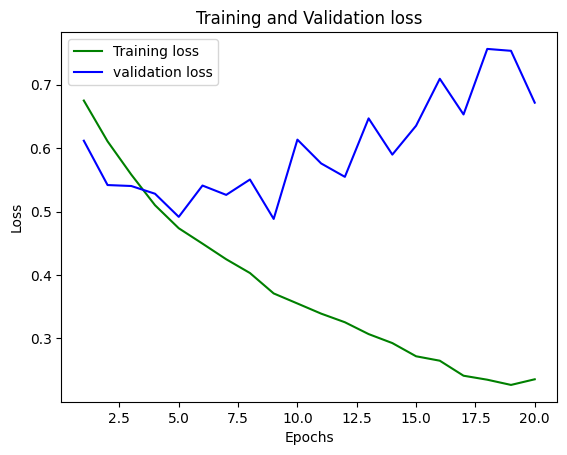

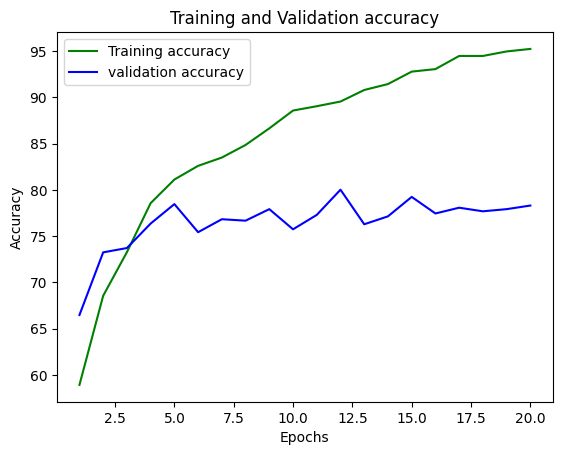

[[493 140]
 [139 514]]
True positive =  493
False positive =  140
False negative =  139
True negative =  514




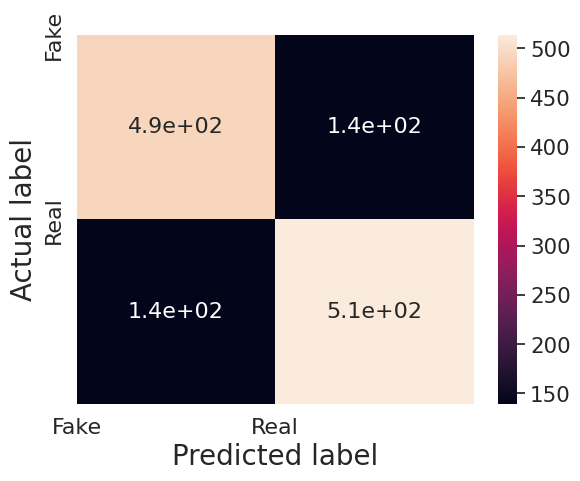

Calculated Accuracy 78.30482115085536


In [29]:
from sklearn.metrics import confusion_matrix
#learning rate
lr = 1e-5#0.001
#number of epochs 
num_epochs = 20

optimizer = torch.optim.Adam(model.parameters(), lr= lr,weight_decay = 1e-5)

#class_weights = torch.from_numpy(np.asarray([1,15])).type(torch.FloatTensor).cuda()
#criterion = nn.CrossEntropyLoss(weight = class_weights).cuda()
criterion = nn.CrossEntropyLoss().cuda()
train_loss_avg =[]
train_accuracy = []
test_loss_avg = []
test_accuracy = []
for epoch in range(1,num_epochs+1):
    l, acc = train_epoch(epoch,num_epochs,train_loader,model,criterion,optimizer)
    train_loss_avg.append(l)
    train_accuracy.append(acc)
    true,pred,tl,t_acc = test(epoch,model,valid_loader,criterion)
    test_loss_avg.append(tl)
    test_accuracy.append(t_acc)
plot_loss(train_loss_avg,test_loss_avg,len(train_loss_avg))
plot_accuracy(train_accuracy,test_accuracy,len(train_accuracy))
print(confusion_matrix(true,pred))
print_confusion_matrix(true,pred)